<a href="https://colab.research.google.com/github/bibekebib/Tellecommunication-Customer-Classification/blob/main/Telecom_Classifiation_with_Hyperparameters_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle ko kuraharu

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 68 May  4 10:24 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              227KB  2021-05-03 13:54:12           4179  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           2397  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            541  
mathurinache/twitter-edge-nodes                             Twitter Edge Nodes                                342MB  2021-03-08 06:43:04            251  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

In [ ]:
!kaggle datasets download -d rashmiranu/banking-dataset-classification

  0% 0.00/409k [00:00<?, ?B/s]
100% 409k/409k [00:00<00:00, 46.3MB/s]


In [ ]:
!unzip banking-dataset-classification.zip

Archive:  banking-dataset-classification.zip
  inflating: new_test.csv            
  inflating: new_train.csv           


In [ ]:
!ls

banking-dataset-classification.zip  new_test.csv   sample_data
kaggle.json			    new_train.csv


# Importing Requirements

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('new_train.csv')
# test_df = pd.read_csv('new_test.csv')

# Data Looking

In [ ]:
df.drop_duplicates(inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous
count,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000
mean,40.012810,258.159614,2.560804,962.043440,0.174762
std,10.403035,258.995259,2.752579,187.973035,0.499078
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous
count,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000
mean,40.012810,258.159614,2.560804,962.043440,0.174762
std,10.403035,258.995259,2.752579,187.973035,0.499078
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [ ]:
df.drop(['pdays', 'previous'], 1, inplace=True)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,nonexistent,no


In [ ]:
# test_df.head()

In [ ]:
# print(test_df.marital.unique(), df.marital.unique())

In [ ]:
df.job.unique()

array(['blue-collar', 'entrepreneur', 'retired', 'admin.', 'student',
       'services', 'technician', 'self-employed', 'management',
       'unemployed', 'unknown', 'housemaid'], dtype=object)

In [ ]:
df_obj = df.select_dtypes(include='object').copy()
df_obj.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# df['y'].replace(['yes', 'no'], [0, 1], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32942 entries, 0 to 32949
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32942 non-null  int64 
 1   job          32942 non-null  object
 2   marital      32942 non-null  object
 3   education    32942 non-null  object
 4   default      32942 non-null  object
 5   housing      32942 non-null  object
 6   loan         32942 non-null  object
 7   contact      32942 non-null  object
 8   month        32942 non-null  object
 9   day_of_week  32942 non-null  object
 10  duration     32942 non-null  int64 
 11  campaign     32942 non-null  int64 
 12  poutcome     32942 non-null  object
 13  y            32942 non-null  object
dtypes: int64(3), object(11)
memory usage: 3.8+ MB


In [ ]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32942 entries, 0 to 32949
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          32942 non-null  object
 1   marital      32942 non-null  object
 2   education    32942 non-null  object
 3   default      32942 non-null  object
 4   housing      32942 non-null  object
 5   loan         32942 non-null  object
 6   contact      32942 non-null  object
 7   month        32942 non-null  object
 8   day_of_week  32942 non-null  object
 9   poutcome     32942 non-null  object
 10  y            32942 non-null  object
dtypes: object(11)
memory usage: 3.0+ MB


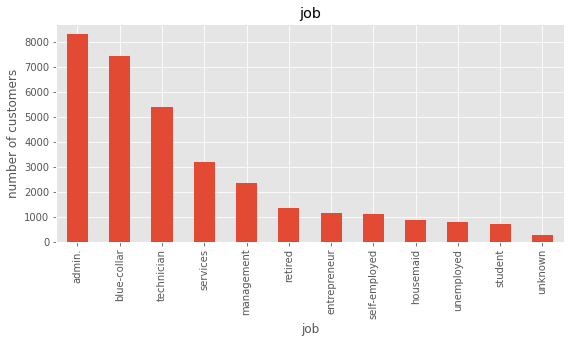

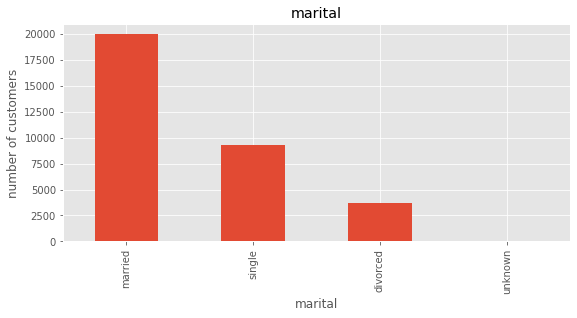

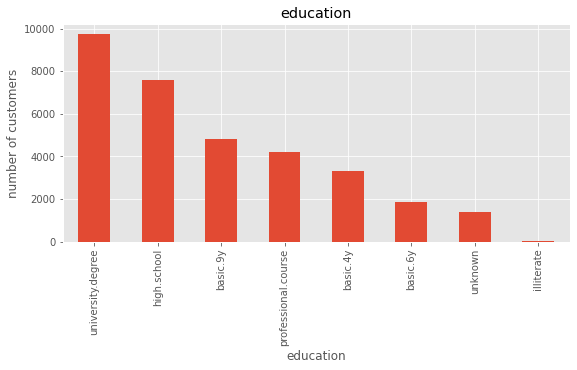

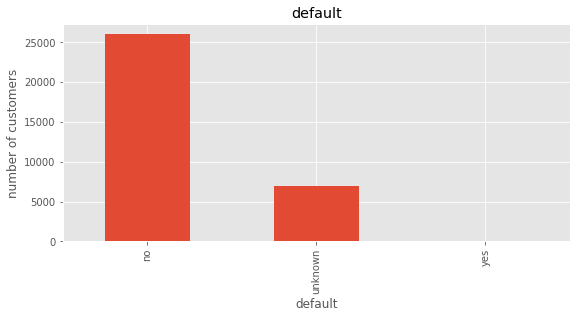

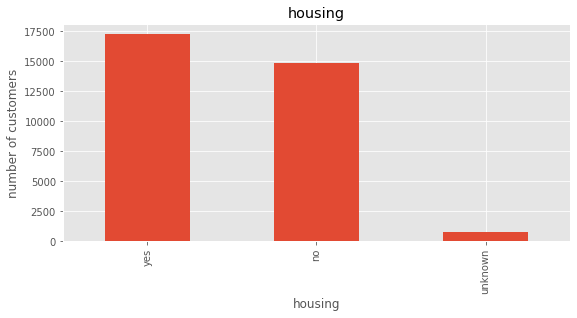

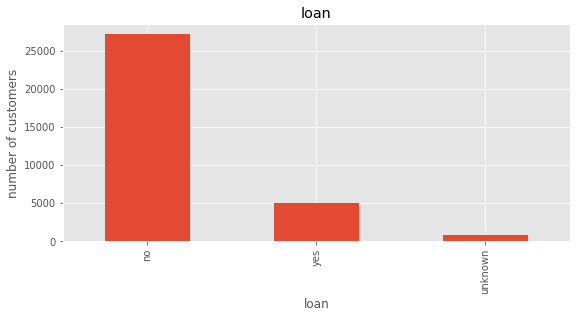

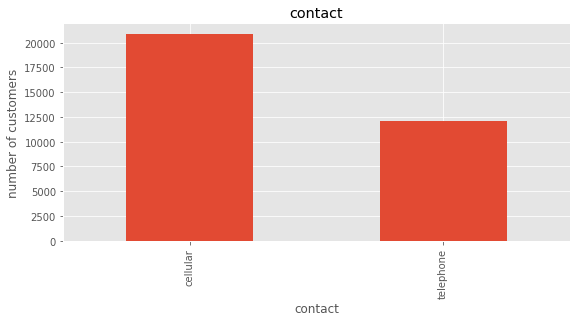

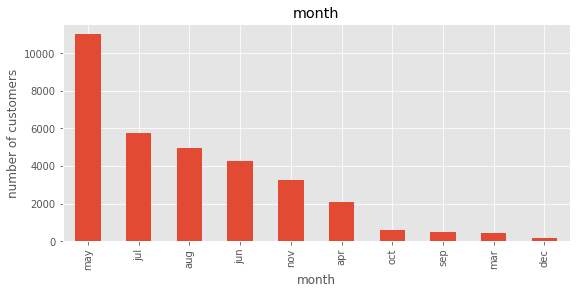

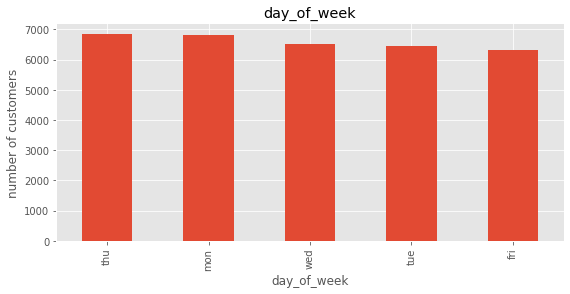

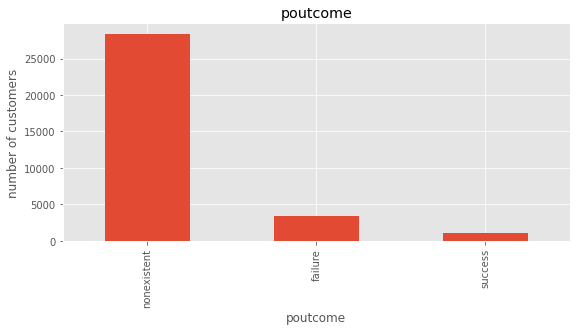

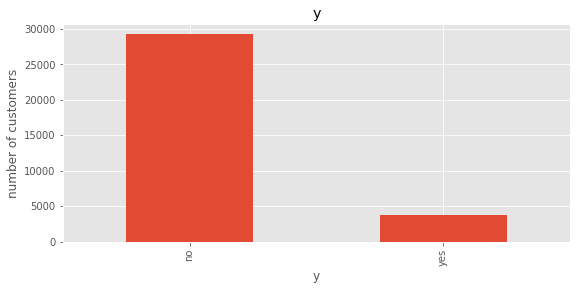

In [ ]:



# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in df_obj:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)



In [ ]:
len(df.columns)

14

In [ ]:
for column in df_obj:
  mode = df[column].mode()[0]
  df[column]=df[column].replace('unknown', mode)

df.job.unique()

array(['blue-collar', 'entrepreneur', 'retired', 'admin.', 'student',
       'services', 'technician', 'self-employed', 'management',
       'unemployed', 'housemaid'], dtype=object)

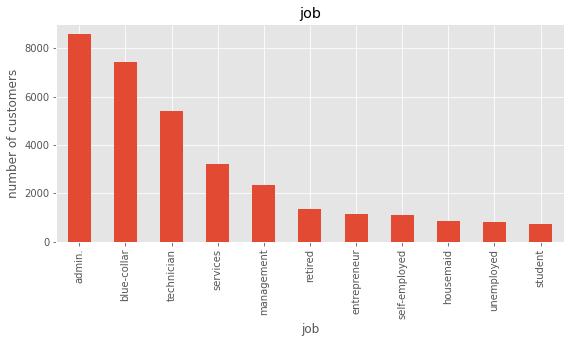

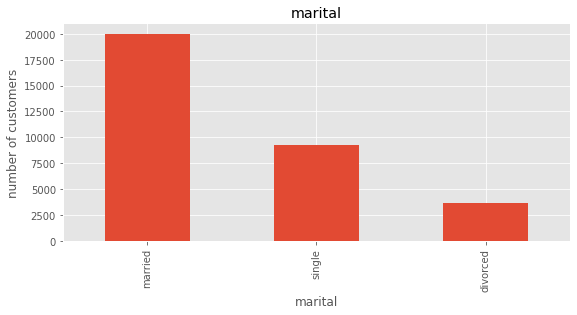

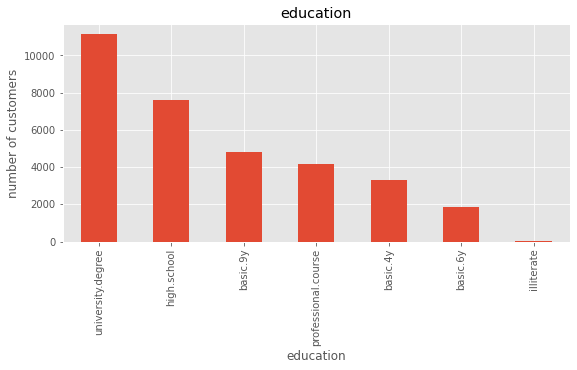

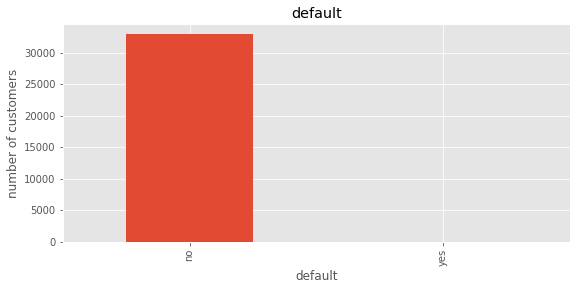

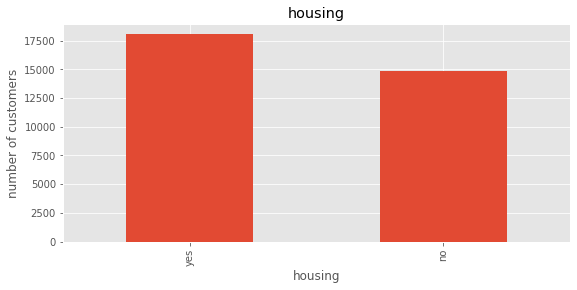

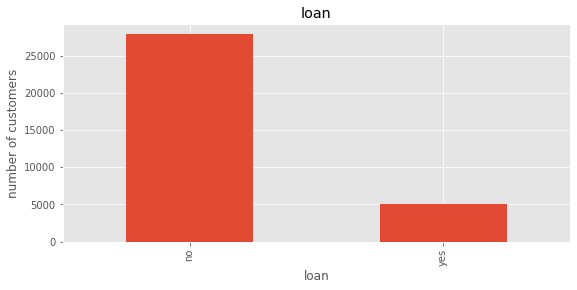

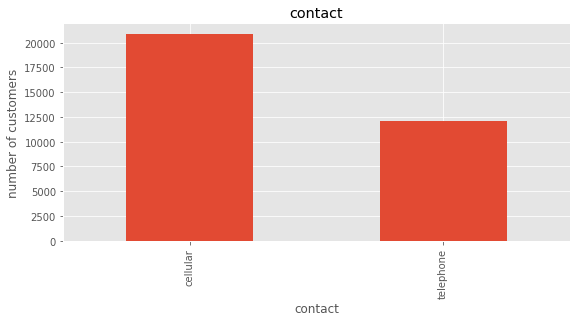

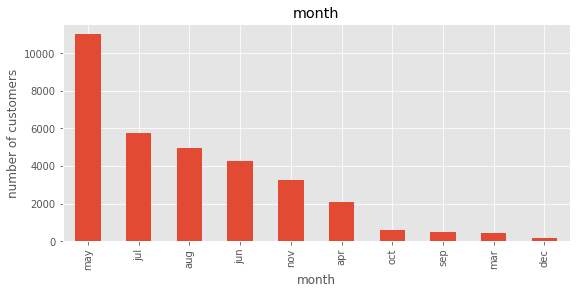

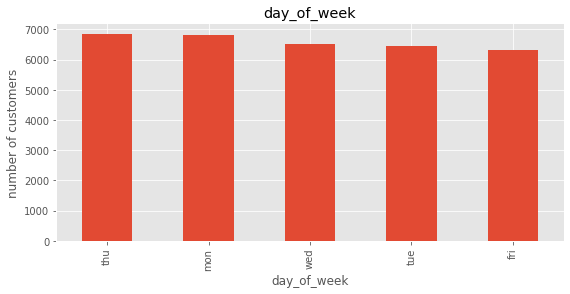

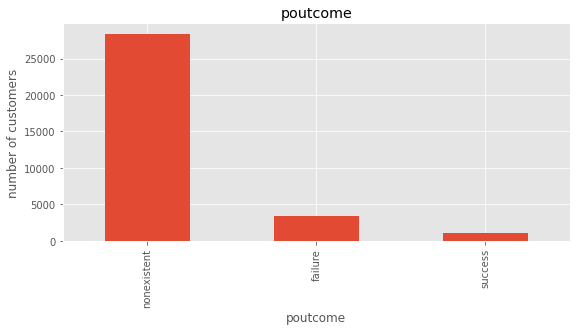

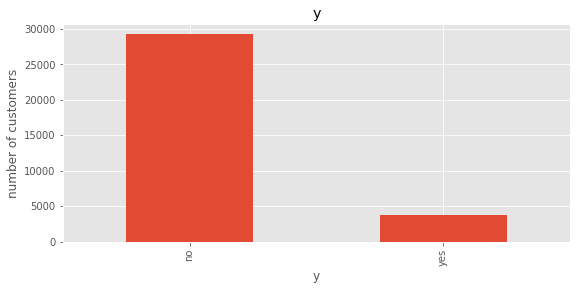

In [ ]:
for column in df_obj:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

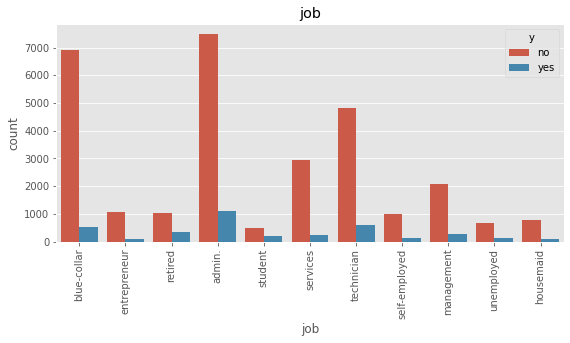

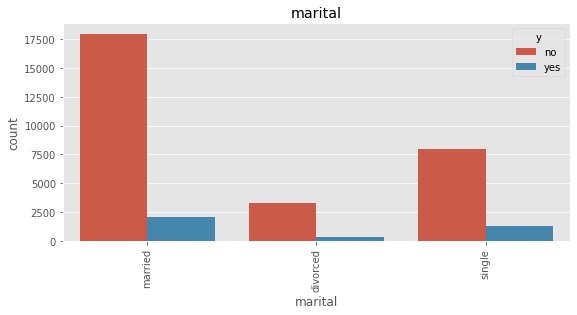

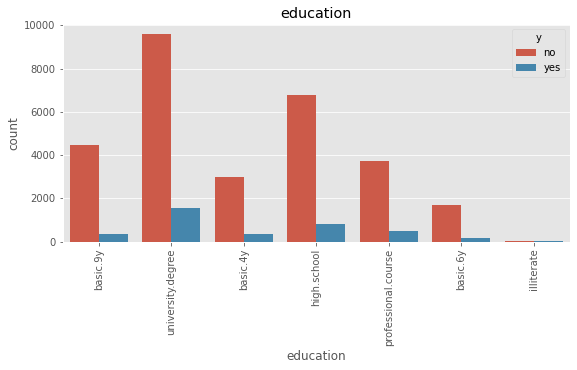

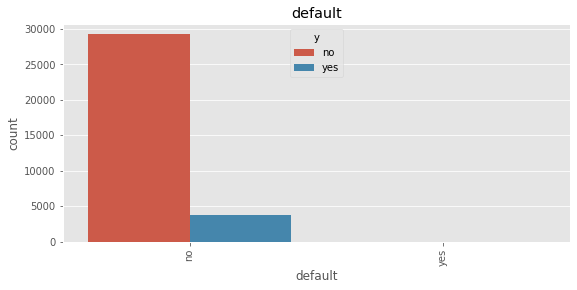

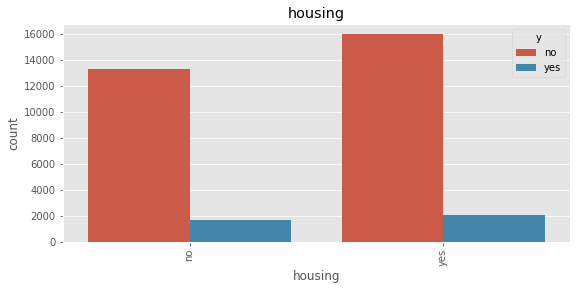

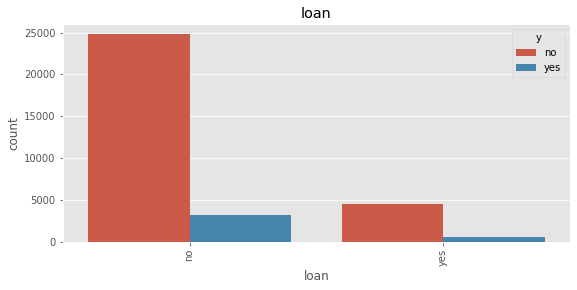

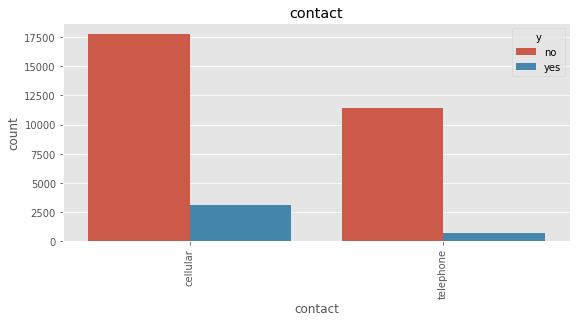

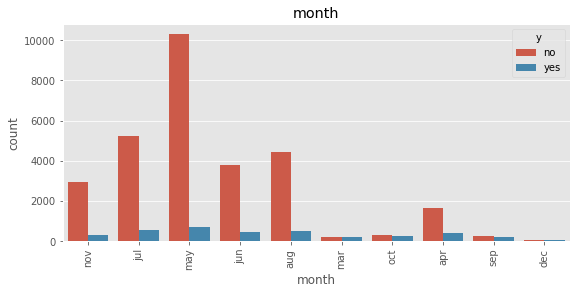

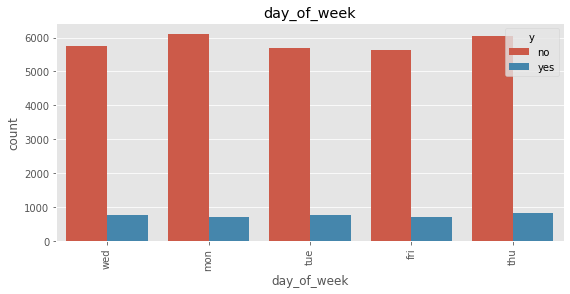

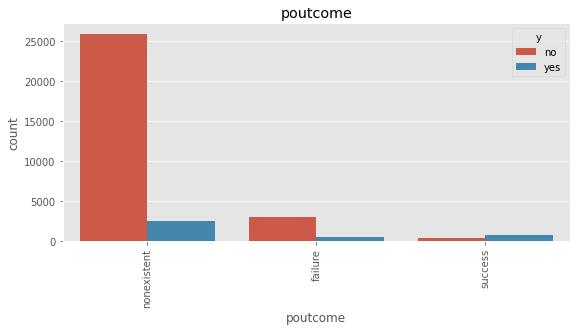

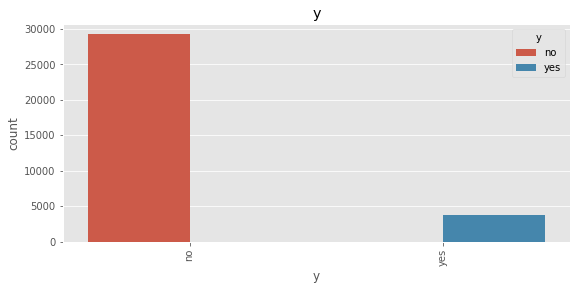

In [ ]:


plt.style.use("ggplot")
for column in df_obj:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(df[column], hue=df["y"])
    plt.title(column)    
    plt.xticks(rotation=90)
    # plt.show()



# time for encoding categorical data.

In [ ]:
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'])

In [ ]:
df_encoded
df_encoded.head()

,age,duration,campaign,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,49,227,4,no,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,37,202,2,no,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
2,78,1148,1,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,36,120,2,no,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,59,368,2,no,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
X = df_encoded.drop('y', 1).copy()
y  = df_encoded['y'].copy()

In [ ]:
X

,age,duration,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,49,227,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,37,202,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
2,78,1148,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,36,120,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,59,368,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,192,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
32946,52,64,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
32947,54,131,4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
32948,29,165,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2)

# Importing machine learning models and all other requirements

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import  SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV


# KNN

In [ ]:
#KNN Algorthm

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
Accuracy = clf.score(X_test,y_test)
Accuracy

0.8835938685688268

The normal way of using KNN gives mere 88.359% which is pretty low for a machine learning model, so we would use RandomSearchCV for Hyper-parameter tuning and try to find the best parameters to get the maximun accuracy.

In [ ]:
print([int(x) for x in np.linspace(100, 1200, num=6)])
# print(x)

[100, 320, 540, 760, 980, 1200]


In [ ]:
n_estimator = [int(x) for (x) in np.linspace(100, 1200, num=12)]
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
criterion = ['gini', 'entropy']

In [ ]:


n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 100, num = 50)]   
weights = ['uniform','distance']
metric = ['euclidean','manhattan','chebyshev','seuclidean','minkowski'] 
random_grid = {
    'n_neighbors': n_neighbors,
    'weights': weights,
    'metric': metric,
}

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
KNN = RandomizedSearchCV(knn, param_distributions=random_grid, verbose=2, cv=3, random_state=42, n_iter=10, scoring='accuracy')

In [ ]:
KNN.fit(X_train, y_train)

In [ ]:
KNN.best_params_

{'metric': 'manhattan', 'n_neighbors': 55, 'weights': 'distance'}

In [ ]:
best_knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 55, weights= 'distance')

In [ ]:
best_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=55, p=2,
                     weights='distance')

In [ ]:
best_knn.score(X_test, y_test)

0.8952800121414479

Even after such difficult RandomizedSearch CV, the accuracy just increased by 1%, but that is still a great achievements. We will also explore other algorithm and see if any of those gives meaningful accuracy.

# Logistic Regression

In [ ]:

clf = LogisticRegression()
clf.fit(X_train, y_train)
Accuracy = clf.score(X_test,y_test)
Accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9056002428289573

wow, Logistic Regression gives 90.5% accuracy by default parameters, the default are themeslves the best close to parameters, still we will also try some other paramteres and go fo hyperparameters tuning, with a hope to get few more level of accuracy. 

In [ ]:
param_dist = {
    'penalty' : ['l1', 'l2'],
    'C' : [0, 1, 2, 3, 4]
}

In [ ]:
logreg = LogisticRegression()


In [ ]:
LG = RandomizedSearchCV(logreg, param_distributions=param_dist, verbose=2, cv=3, random_state=42, n_iter=10, scoring='accuracy')

In [ ]:
LG.fit(X_train, y_train)

In [ ]:
LG.best_params_

{'C': 3, 'penalty': 'l2'}

In [ ]:
LG.best_score_

0.9036921660223535

In [ ]:
lg_best = LogisticRegression(C = 3, penalty='l2')
lg_best.fit(X_train, y_train)
lg_best.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.906359083320686

90.6% Haha, 90.5% was given by Logistic Regression algorith without hyperparameter tuning, since l2 is the default for penalty, however c=1 is the default and 3 is used here, so it increased .1% increase of accuracy. 
 
C is Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization. 

# GaussianNB (Naive Bayes Classifier)

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8665958415541053

Really, this is really low Accuracy, I thought it should give better. But I must reconsider once the dataset, it must have outliers, thats making such less accuracy. But also, lets do RandomisedSearhCV hyperparameters tuning and hope we get better results than prior.


In [ ]:

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
NB = GaussianNB()


In [ ]:
NB_ran = RandomizedSearchCV(NB, param_distributions=params_NB, verbose=2, cv=3, random_state=42, n_iter=10, scoring='accuracy')

In [ ]:
NB_ran.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] var_smoothing=2.848035868435799e-08 .............................
[CV] .............. var_smoothing=2.848035868435799e-08, total=   0.1s
[CV] var_smoothing=2.848035868435799e-08 .............................
[CV] .............. var_smoothing=2.848035868435799e-08, total=   0.1s
[CV] var_smoothing=2.848035868435799e-08 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............. var_smoothing=2.848035868435799e-08, total=   0.1s
[CV] var_smoothing=1.5199110829529332e-05 ............................
[CV] ............. var_smoothing=1.5199110829529332e-05, total=   0.1s
[CV] var_smoothing=1.5199110829529332e-05 ............................
[CV] ............. var_smoothing=1.5199110829529332e-05, total=   0.1s
[CV] var_smoothing=1.5199110829529332e-05 ............................
[CV] ............. var_smoothing=1.5199110829529332e-05, total=   0.1s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV] ............. var_smoothing=4.3287612810830526e-07, total=   0.1s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV] ............. var_smoothing=4.3287612810830526e-07, total=   0.1s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV] ............. var_smoothing=4.3287612810830526e-07, total=   0.1s
[CV] var_smoothing=8.111308307896872e-05 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.2s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.000000...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=2)

In [ ]:
NB_ran.best_params_

{'var_smoothing': 1.5199110829529332e-05}

In [ ]:
NB_ran.best_score_

0.8931051317325891

In [ ]:
NB_best = GaussianNB(var_smoothing=1.51991108295293320)

In [ ]:
NB_best.fit(X_train, y_train)
NB_best.score(X_test, y_test)

0.8946729397480649


Trust me, I 86.65% to 89.4% is great imporvement by numbers, but cant go with this level of accuracy. Lets try some more algorithms.

# Random Forest Classifier

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9039307937471543

wow, 90.39% accuracy in default mode. Lets pray we get couple of percentage improvement.

In [ ]:
param_dist = {
    "n_estimators" : n_estimator,
    "max_depth" : max_depth,
    "min_samples_leaf":min_samples_leaf,
    "criterion":criterion,
    "min_samples_split":min_samples_split 
}

In [ ]:
rf = RandomForestClassifier()


In [ ]:
rb_hyper = RandomizedSearchCV(rf, param_distributions=param_dist, verbose=2, cv=3, random_state=42, n_iter=10, scoring='accuracy')

In [ ]:
rb_hyper.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_depth=20, criterion=gini 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_depth=20, criterion=gini, total=  14.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_depth=20, criterion=gini 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_depth=20, criterion=gini, total=  14.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_depth=20, criterion=gini 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_depth=20, criterion=gini, total=  14.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_depth=30, criterion=gini 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_depth=30, criterion=gini, total=  19.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_depth=30, criterion=gini 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_depth=30, criterion=gini, total=  19.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_depth=30, criterion=gini 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_depth=30, criterion=gini, total=  19.4s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, m

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  5.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rb_hyper.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 300}

In [ ]:
rb_hyper.best_score_

0.9069935325054194

In [ ]:
best_rf = RandomForestClassifier(criterion= 'gini',
 max_depth=30,
 min_samples_leaf= 1,
 min_samples_split= 15,
n_estimators= 300)

In [ ]:
best_rf.fit(X_train, y_train)
best_rf.score(X_test, y_test)

0.906359083320686

Yuck, Nothing on progress in terms of accuracy.

Lets try SVM, the best in the business for now. I dont know how it will respont to it. 

In [ ]:
clf = SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8977083017149795

I am disappointed yet again. BUt the lord of these things always say. Dont always go for Accuracy, Accuracy is a lie, there are othere parameters like f1 score, precise. 

lets do Hyperparamater tuning for this one.

In [ ]:
param_dist = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

In [ ]:
svc_hyper = RandomizedSearchCV(SVC(), param_distributions=param_dist, verbose=2, cv=3, random_state=42, n_iter=10, scoring='accuracy')

In [ ]:
svc_hyper.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] kernel=rbf, gamma=0.001, C=1 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... kernel=rbf, gamma=0.001, C=1, total=  14.1s
[CV] kernel=rbf, gamma=0.001, C=1 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.1s remaining:    0.0s


[CV] ..................... kernel=rbf, gamma=0.001, C=1, total=  14.8s
[CV] kernel=rbf, gamma=0.001, C=1 ....................................
[CV] ..................... kernel=rbf, gamma=0.001, C=1, total=  14.7s
[CV] kernel=rbf, gamma=0.1, C=100 ....................................
[CV] ..................... kernel=rbf, gamma=0.1, C=100, total= 1.5min
[CV] kernel=rbf, gamma=0.1, C=100 ....................................
[CV] ..................... kernel=rbf, gamma=0.1, C=100, total= 1.4min
[CV] kernel=rbf, gamma=0.1, C=100 ....................................
[CV] ..................... kernel=rbf, gamma=0.1, C=100, total= 1.4min
[CV] kernel=rbf, gamma=1, C=0.1 ......................................
[CV] ....................... kernel=rbf, gamma=1, C=0.1, total=  57.8s
[CV] kernel=rbf, gamma=1, C=0.1 ......................................
[CV] ....................... kernel=rbf, gamma=1, C=0.1, total=  57.5s
[CV] kernel=rbf, gamma=1, C=0.1 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 26.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=2)

In [ ]:
svc_hyper.best_params_  

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
svc_hyper.best_score_

0.896899797807642

In [ ]:
best_svc = SVC(C=1000, gamma=0.001, kernel='rbf')
best_svc.fit(X_train, y_train)
best_svc.score(X_test, y_test)

0.8980118379116709

**that's it, noting more to do. I dont think, the outliers would give, it to raise the accuracy beyong 90%.**
